In [211]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

plt.rc('font', family='NanumBarunGothic')

In [3]:
import warnings

warnings.filterwarnings(action='ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
df = pd.read_csv('/content/drive/MyDrive/계명대학교_최현성_분석연습/아파트물가지수/dataset/dataset.csv', index_col=0)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4861 entries, 0 to 4860
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구+도로명   4861 non-null   object 
 1   단지명       4861 non-null   object 
 2   전용면적(㎡)   4861 non-null   float64
 3   계약년월      4861 non-null   int64  
 4   계약일       4861 non-null   int64  
 5   거래금액(만원)  4861 non-null   object 
 6   건축년도      4861 non-null   float64
 7   계약년월일     4861 non-null   int64  
 8   경도        4861 non-null   float64
 9   위도        4861 non-null   float64
 10  역세권       4861 non-null   int64  
 11  의원수       4861 non-null   int64  
 12  요양병원유무    4861 non-null   int64  
 13  경찰서유무     4861 non-null   int64  
 14  학교수       4861 non-null   int64  
 15  버스정류장수    4861 non-null   int64  
 16  세대수       4861 non-null   float64
 17  주차대수      4861 non-null   float64
 18  욕실수       4861 non-null   float64
 19  방수        4861 non-null   float64
 20  최고층       4861 non-null   floa

In [79]:
def delete_comma(a):
    a = a.replace(',', '')
    return int(a)
df['거래금액(만원)'] = df['거래금액(만원)'].apply(delete_comma)

In [67]:
drop_col = ['시군구+도로명', '단지명', '계약년월', '계약일', '계약년월일', '경도', '위도']
df = df.drop(drop_col, axis=1)

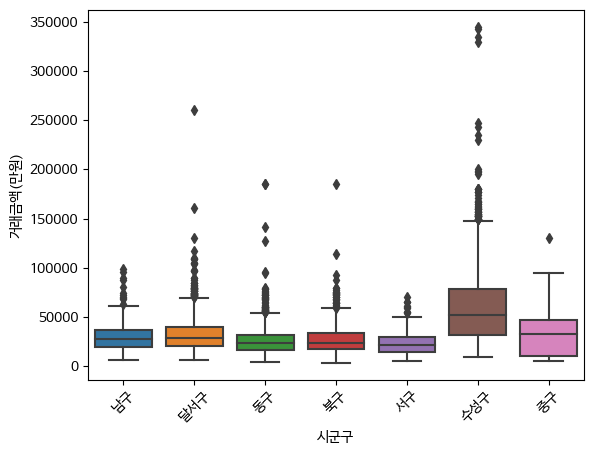

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert '거래금액(만원)' column to float
df['거래금액(만원)'] = df['거래금액(만원)'].astype(float)

# Create the box plot
sns.boxplot(data=df, x='시군구', y='거래금액(만원)')

# Customize the plot
plt.xlabel('시군구')
plt.ylabel('거래금액(만원)')
plt.xticks(rotation=45)

plt.show()

In [68]:
df = pd.concat([df.drop(['시군구'], axis=1), pd.get_dummies(df['시군구'])], axis=1)

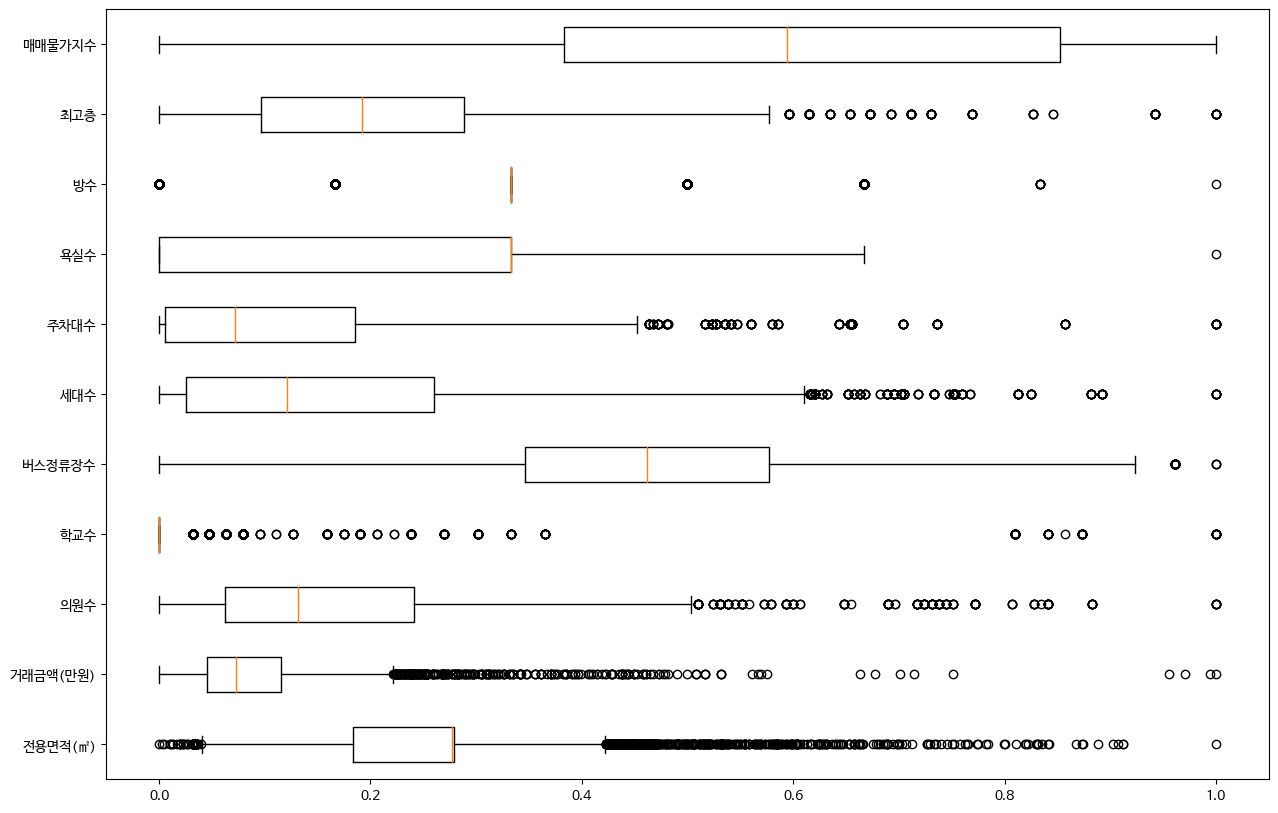

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaled_data = df[['전용면적(㎡)', '거래금액(만원)', '의원수', '학교수', '버스정류장수', '세대수', '주차대수', '욕실수', '방수', '최고층', '매매물가지수']]

scaler = MinMaxScaler()
scaler.fit(scaled_data)
scaled_data = pd.DataFrame(scaler.transform(scaled_data), columns=scaled_data.columns)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(scaled_data, labels=scaled_data.columns, vert=False)

plt.show()

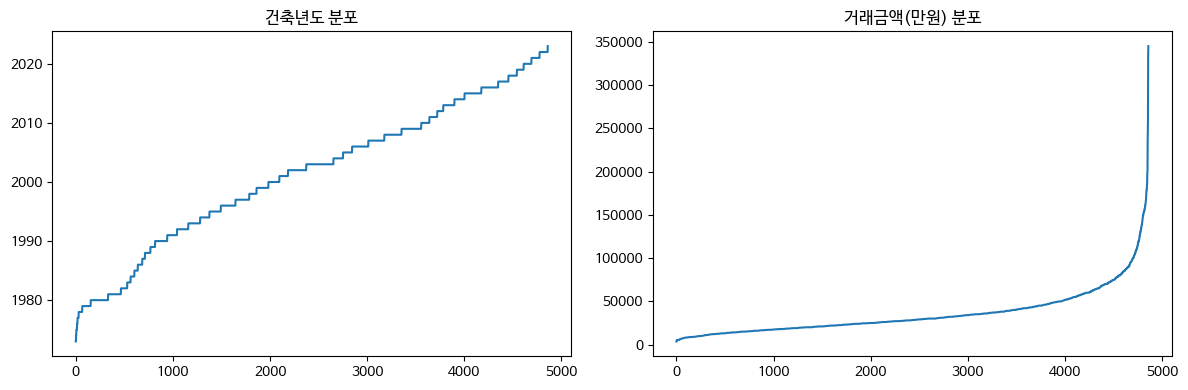

In [71]:
#건축년도별로 고르게 분포 되어 있는 것을 확인가능함.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df['건축년도'].sort_values().reset_index(drop=True).plot(ax=ax1, kind='line')
ax1.set_title('건축년도 분포')

#이 외에 집값이 4억이상에서 급격하게 증가하는 것을 확인 할 수 있음.
df['거래금액(만원)'].sort_values().reset_index(drop=True).plot(ax=ax2)
ax2.set_title('거래금액(만원) 분포')

plt.tight_layout()

plt.show()

<Axes: xlabel='건축년도', ylabel='거래금액(만원)'>

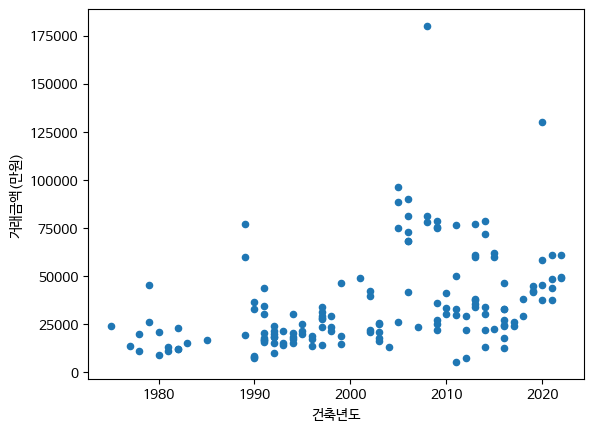

In [72]:
#건축년도가 최근일수록 그래프의 상한이 높아지는 것을 확인할 수 있음
sampled_df = df.sample(n=150)  # 샘플 150개로 설정
sampled_df.plot(kind='scatter', x='건축년도', y='거래금액(만원)')

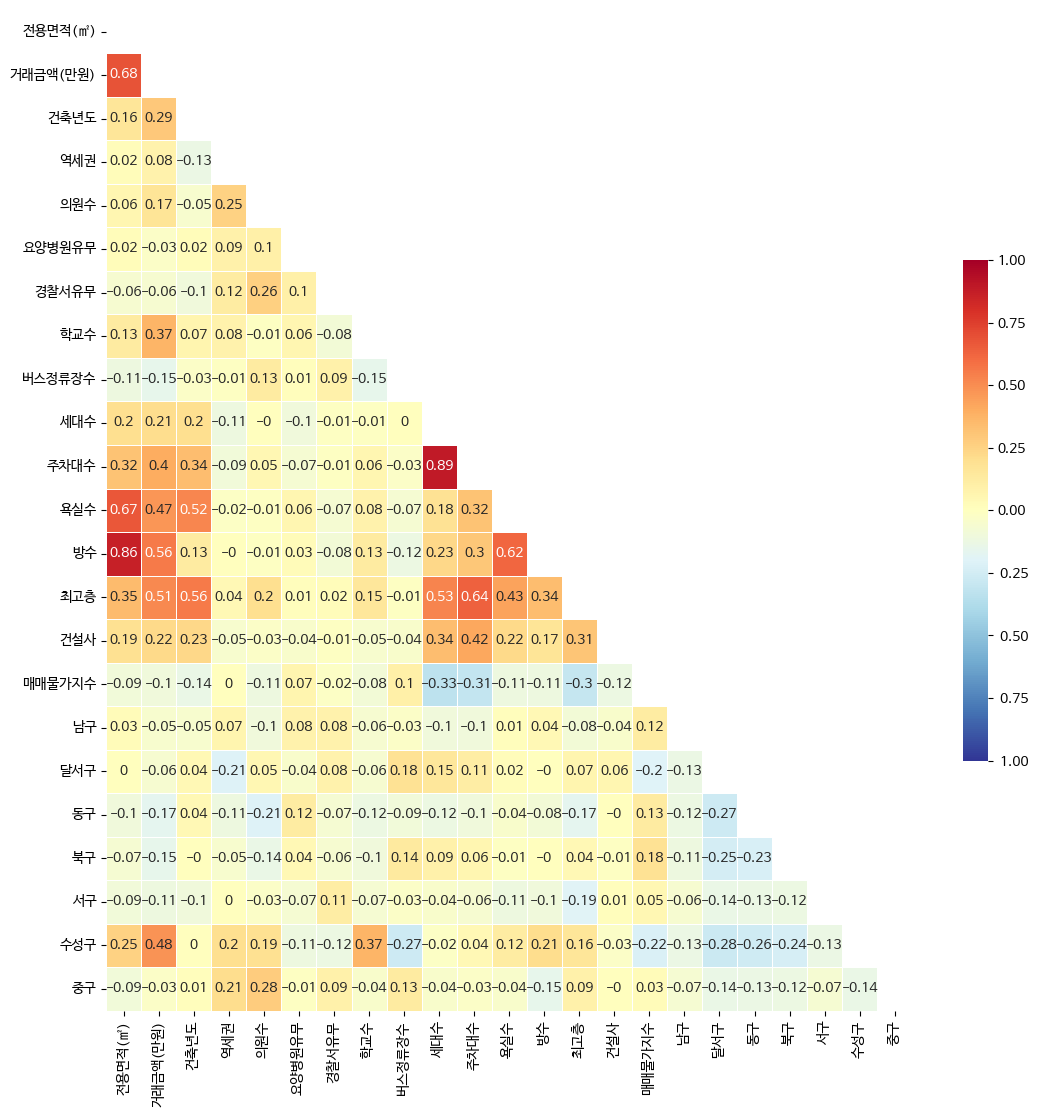

In [73]:
# 전처리 후 상관관계

cor_df = df.corr()
corr_df = cor_df.apply(lambda x: round(x ,2))
corr_df

# - 1에 가까울 수록 관계가 깊으며(강한 양의 상관관계) 0에 가까울 수록 관계가 적다(약한 양의 상관관계).
# 수치형 데이터 간의 상관계수를 나타내는 히트맵

mask = np.triu(np.ones_like(corr_df, dtype=np.bool))
fig, ax = plt.subplots( figsize=(13, 13) )
sns.heatmap(corr_df, annot=True, cmap="RdYlBu_r", mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, vmin = -1, vmax = 1)
plt.show()

In [13]:
y = df['거래금액(만원)']
X = df.drop(['거래금액(만원)'], axis=1)

In [14]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [15]:
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [16]:
def print_score_reg(reg, X_train, y_train, X_test, y_test, train=True):
    if train:
        reg_pred = reg.predict(X_train)
        mse = mean_squared_error(y_train, reg_pred)
        rmse = np.sqrt(mse)
        print('\nMAE : {0:.3f},\n'.format(mean_absolute_error(y_train, reg_pred)))
        print('\nMSE : {0:.3f}, RMSE : {1:.3F}\n'.format(mse, rmse))
        print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(y_train, reg_pred)))

    elif train==False:
        reg_pred = reg.predict(X_test)
        mse = mean_squared_error(y_test, reg_pred)
        rmse = np.sqrt(mse)
        print('\nMAE : {0:.3f},\n'.format(mean_absolute_error(y_test, reg_pred)))
        print('\nMSE : {0:.3f}, RMSE : {1:.3F}\n'.format(mse, rmse))
        print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(y_test, reg_pred)))

# 1차 분석

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1004)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3402, 22) (1459, 22) (3402,) (1459,)


## Linear

In [18]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression

ln = LinearRegression()
ln.fit(X_train, y_train)

LinearRegression()

In [19]:
print_score_reg(ln, X_train, y_train, X_test, y_test, train=True)
print_score_reg(ln, X_train, y_train, X_test, y_test, train=False)


MAE : 9374.595,


MSE : 227009239.908, RMSE : 15066.826


r2 Variance score  0.709


MAE : 9029.976,


MSE : 241400676.524, RMSE : 15537.074


r2 Variance score  0.703



## Lasso

In [20]:
ls = Lasso(alpha = 0.01) # alpha = Lambda
ls.fit(X_train, y_train)

Lasso(alpha=0.01)

In [21]:
print_score_reg(ls, X_train, y_train, X_test, y_test, train=True)
print_score_reg(ls, X_train, y_train, X_test, y_test, train=False)


MAE : 9374.551,


MSE : 227009240.095, RMSE : 15066.826


r2 Variance score  0.709


MAE : 9029.932,


MSE : 241400628.237, RMSE : 15537.073


r2 Variance score  0.703



## Ridge

In [22]:
rd = Ridge(alpha = 0.01) # alpha = Lambda
rd.fit(X_train, y_train)

Ridge(alpha=0.01)

In [23]:
print_score_reg(rd, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rd, X_train, y_train, X_test, y_test, train=False)


MAE : 9373.825,


MSE : 227009296.968, RMSE : 15066.828


r2 Variance score  0.709


MAE : 9029.302,


MSE : 241407215.448, RMSE : 15537.285


r2 Variance score  0.703



## LightGBM

In [24]:
import lightgbm as lgb

param = {'objective': 'regression', 'metric':'rmse'}

train_data = lgb.Dataset(X_train, label=y_train.values)

num_round = 30

lgbm = lgb.train(param, train_data, num_round)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1234
[LightGBM] [Info] Number of data points in the train set: 3402, number of used features: 22
[LightGBM] [Info] Start training from score 35878.702234


In [25]:
print_score_reg(lgbm, X_train, y_train, X_test, y_test, train=True)
print_score_reg(lgbm, X_train, y_train, X_test, y_test, train=False)


MAE : 5020.037,


MSE : 69832293.987, RMSE : 8356.572


r2 Variance score  0.910


MAE : 5693.611,


MSE : 111622122.959, RMSE : 10565.137


r2 Variance score  0.863



## RandomForest

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42) # 난수시드 설정
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=False)


MAE : 2060.469,


MSE : 14188290.338, RMSE : 3766.735


r2 Variance score  0.982


MAE : 5159.080,


MSE : 94197946.485, RMSE : 9705.563


r2 Variance score  0.884



### Feature importance

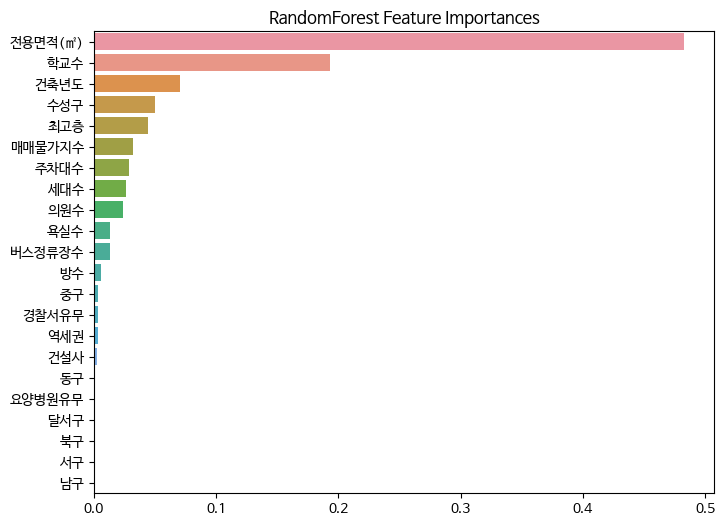

In [28]:
feature_importances = rf_reg.feature_importances_

fi_values = pd.Series(feature_importances, index = X_train.columns)

fi_top = fi_values.sort_values(ascending=False)

plt.figure(figsize=(8,6))

plt.title('RandomForest Feature Importances')
sns.barplot(x=fi_top, y=fi_top.index)
plt.show()

# 2차 분석 (Feature importance 기준 상위 10개 변수 사용)

In [29]:
new_X = X[['전용면적(㎡)','학교수','건축년도','수성구','최고층','매매물가지수','주차대수','세대수','의원수','욕실수']] # 상위 top 10개 변수

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.3, random_state = 1004)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3402, 10) (1459, 10) (3402,) (1459,)


## RandomForest

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42) # 난수시드 설정
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=False)


MAE : 2104.406,


MSE : 14448975.612, RMSE : 3801.181


r2 Variance score  0.981


MAE : 5221.369,


MSE : 99211884.885, RMSE : 9960.516


r2 Variance score  0.878



### Feature importance

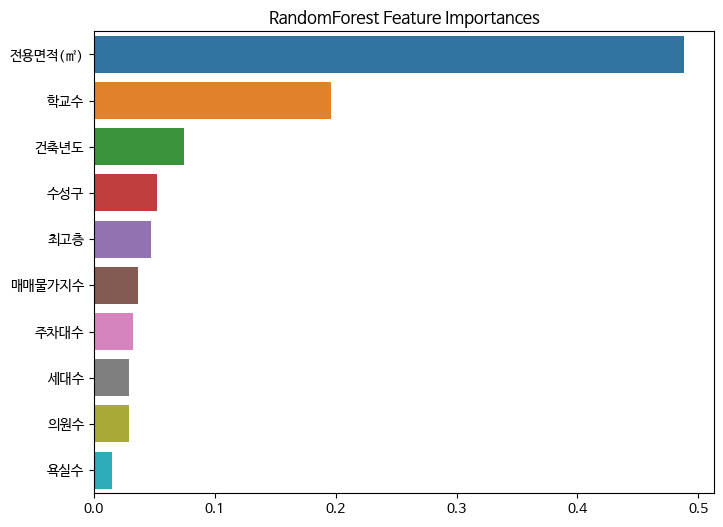

In [33]:
feature_importances = rf_reg.feature_importances_

fi_values = pd.Series(feature_importances, index = X_train.columns)

fi_top = fi_values.sort_values(ascending=False)

plt.figure(figsize=(8,6))

plt.title('RandomForest Feature Importances')
sns.barplot(x=fi_top, y=fi_top.index)
plt.show()

## Ridge

In [34]:
rd = Ridge(alpha = 0.01) # alpha = Lambda
rd.fit(X_train, y_train)

Ridge(alpha=0.01)

In [35]:
print_score_reg(rd, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rd, X_train, y_train, X_test, y_test, train=False)


MAE : 9612.837,


MSE : 233066673.174, RMSE : 15266.521


r2 Variance score  0.701


MAE : 9143.967,


MSE : 243701920.020, RMSE : 15610.955


r2 Variance score  0.700



# 3차 분석 (면적을 제외한 상위 9개 변수 사용)

In [36]:
new_X = X[['학교수','건축년도','수성구','최고층','매매물가지수','주차대수','세대수','의원수','욕실수']] # 상위 top 10개 변수

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.3, random_state = 1004)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3402, 9) (1459, 9) (3402,) (1459,)


## RandomForest

In [38]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42) # 난수시드 설정
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=False)


MAE : 3123.535,


MSE : 28558612.302, RMSE : 5344.026


r2 Variance score  0.963


MAE : 7183.394,


MSE : 159295659.166, RMSE : 12621.238


r2 Variance score  0.804



### Feature importance

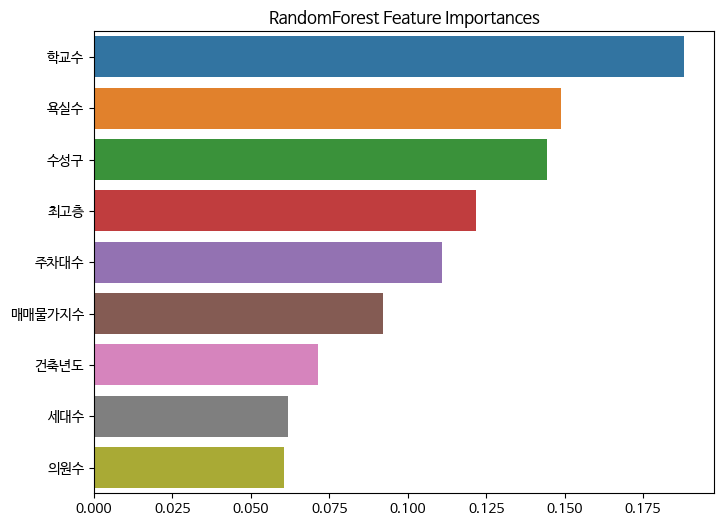

In [40]:
feature_importances = rf_reg.feature_importances_

fi_values = pd.Series(feature_importances, index = X_train.columns)

fi_top = fi_values.sort_values(ascending=False)

plt.figure(figsize=(8,6))

plt.title('RandomForest Feature Importances')
sns.barplot(x=fi_top, y=fi_top.index)
plt.show()

## Ridge

In [41]:
rd = Ridge(alpha = 0.01) # alpha = Lambda
rd.fit(X_train, y_train)

Ridge(alpha=0.01)

In [42]:
print_score_reg(rd, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rd, X_train, y_train, X_test, y_test, train=False)


MAE : 11793.268,


MSE : 335596542.163, RMSE : 18319.294


r2 Variance score  0.570


MAE : 11182.403,


MSE : 345554949.972, RMSE : 18589.108


r2 Variance score  0.575



# 4차 분석 (Feature importance 기준 상위 10개 변수 사용)

In [43]:
new_X = X[['전용면적(㎡)','학교수','건축년도','수성구','최고층','매매물가지수','주차대수','세대수','의원수','욕실수']] # 상위 top 10개 변수

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.3, random_state = 1004)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3402, 10) (1459, 10) (3402,) (1459,)


## RandomForest

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42) # 난수시드 설정
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=False)


MAE : 2104.406,


MSE : 14448975.612, RMSE : 3801.181


r2 Variance score  0.981


MAE : 5221.369,


MSE : 99211884.885, RMSE : 9960.516


r2 Variance score  0.878



### GridSearch

In [47]:
from sklearn.model_selection import GridSearchCV

rf_reg_params = {
    "n_estimators":[50,100,150],
    "max_depth":[10, 30, 50],
    "max_features":[6,8,10,12,14]
}

rf_reg = RandomForestRegressor(random_state=42) # 난수시드 설정
rf_reg_cv = GridSearchCV(rf_reg, rf_reg_params, scoring="r2", n_jobs=-1, verbose=1, cv=3)

rf_reg_cv.fit(X_train, y_train) # 데이터 학습
rf_reg_best_params = rf_reg_cv.best_params_ # 최고 점수를 낸 파라미터
print(f"Best paramters: {rf_reg_best_params})")

rf_reg = RandomForestRegressor(**rf_reg_best_params) # ** 은 (키워드 = 특정 값) 형태로 함수 호출 / 딕셔너리 형태
rf_reg.fit(X_train, y_train) # 데이터 학습
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best paramters: {'max_depth': 30, 'max_features': 8, 'n_estimators': 150})

MAE : 2032.725,


MSE : 13163219.525, RMSE : 3628.115


r2 Variance score  0.983


MAE : 5142.620,


MSE : 94615583.568, RMSE : 9727.054


r2 Variance score  0.884



## RandomForest (After Grid Search)

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42, max_depth=30, max_features=8, n_estimators=150) # 난수시드 설정
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=8, n_estimators=150,
                      random_state=42)

In [49]:
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=False)


MAE : 2050.776,


MSE : 13730836.786, RMSE : 3705.514


r2 Variance score  0.982


MAE : 5152.211,


MSE : 95164813.369, RMSE : 9755.245


r2 Variance score  0.883



### Feature importance

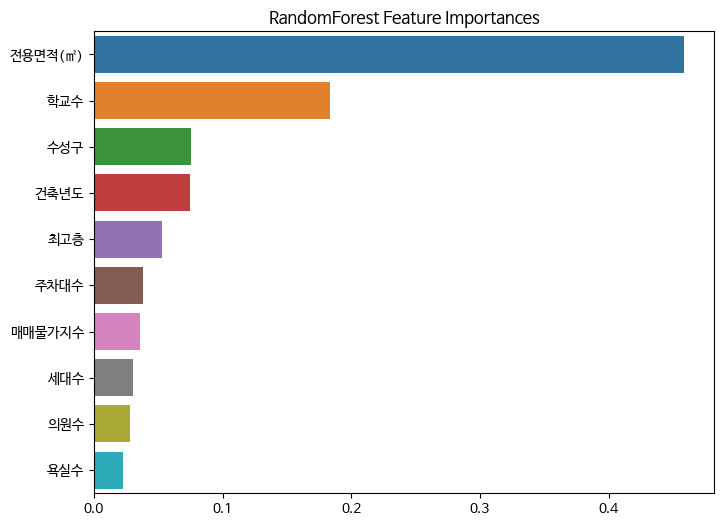

In [50]:
feature_importances = rf_reg.feature_importances_

fi_values = pd.Series(feature_importances, index = X_train.columns)

fi_top = fi_values.sort_values(ascending=False)

plt.figure(figsize=(8,6))

plt.title('RandomForest Feature Importances')
sns.barplot(x=fi_top, y=fi_top.index)
plt.show()

## RandomForest(max_depth=3)(시각화용)

In [51]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42, max_depth=3) # 난수시드 설정
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [52]:
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=True)
print_score_reg(rf_reg, X_train, y_train, X_test, y_test, train=False)


MAE : 10479.943,


MSE : 247577552.490, RMSE : 15734.597


r2 Variance score  0.683


MAE : 10293.816,


MSE : 265474286.901, RMSE : 16293.382


r2 Variance score  0.674



### Plot Tree

In [53]:
from sklearn import tree

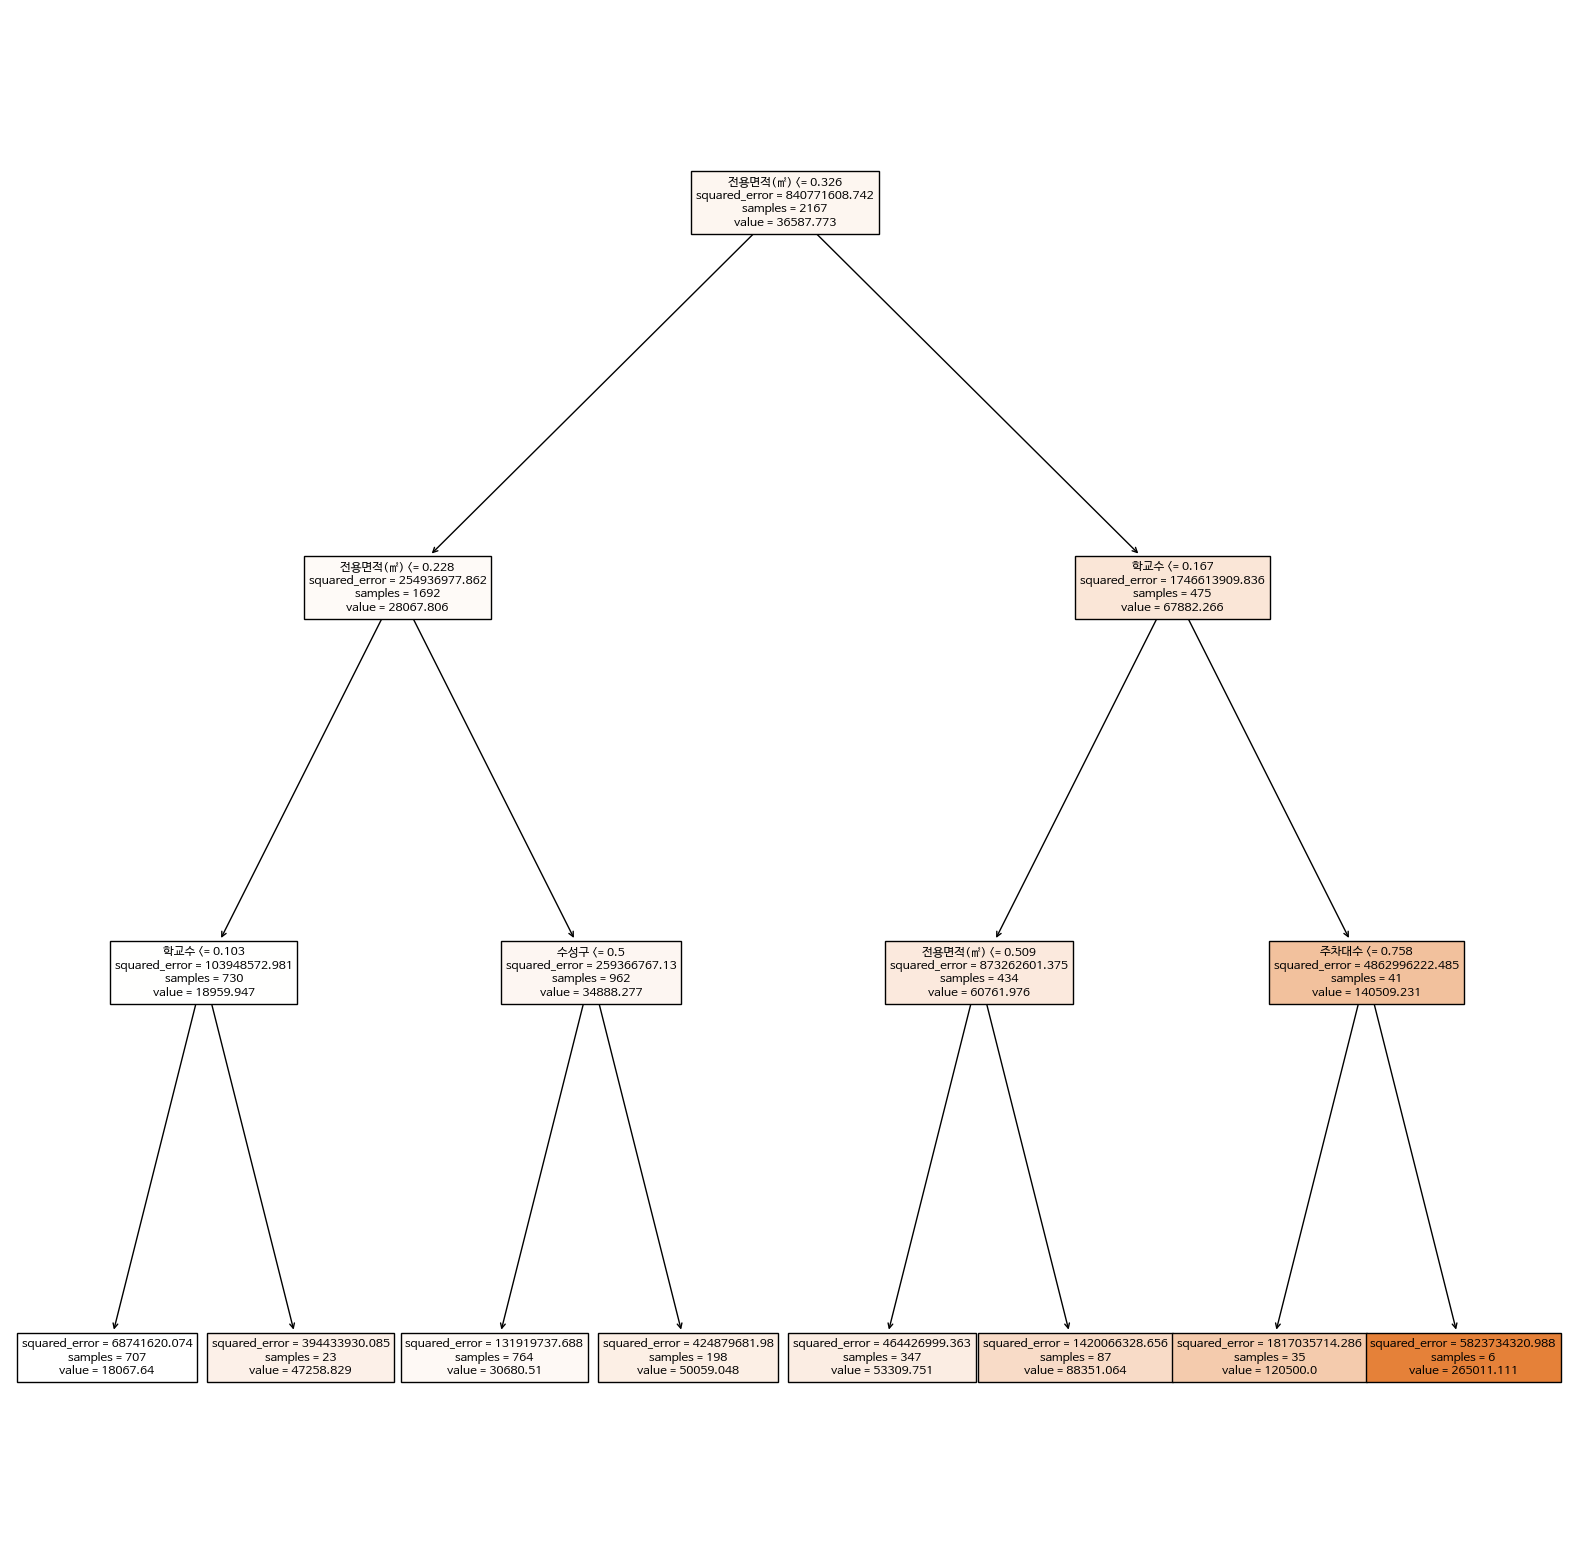

In [54]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf_reg.estimators_[0], feature_names=new_X.columns, filled=True)

In [55]:
compare_X = df.drop(['거래금액(만원)'], axis=1)

scaler = MinMaxScaler()
scaler.fit(compare_X)

compare_set = compare_X.copy()
compare_set = compare_set.iloc[0:2]
compare_set['전용면적(㎡)'].iloc[0] = 0.326
compare_set['전용면적(㎡)'].iloc[1] = 0.228
compare_set['학교수'].iloc[0] = 0.167
compare_set['학교수'].iloc[1] = 0.103
compare_set['주차대수'].iloc[0] = 0.758
compare_set['주차대수'].iloc[1] = 0.300

compare_set = pd.DataFrame(scaler.inverse_transform(compare_set), columns=compare_X.columns)

compare_set = compare_set[['전용면적(㎡)', '학교수', '주차대수']]

In [56]:
compare_set

,전용면적(㎡),학교수,주차대수
0,97.2757,10.521,3185.116
1,71.6046,6.489,1260.600


## OLS

In [57]:
from statsmodels.formula.api import ols

In [58]:
ols_dataset = pd.concat([new_X, y],axis=1)

In [59]:
ols_dataset.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9','X10', 'Y']

# ['전용면적(㎡)', '학교수', '건축년도', '수성구', '최고층', '매매물가지수', '주차대수', '세대수', '의원수','욕실수', '거래금액(만원)']

In [60]:
model = ols(formula = "Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10", data = ols_dataset).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1139.
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:34:40   Log-Likelihood:                -53755.
No. Observations:                4861   AIC:                         1.075e+05
Df Residuals:                    4850   BIC:                         1.076e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.044e+04   1143.561    -17.871      0.0